This is a project for the course "Deep Learning for Visual Recognition" in Aarhus university

We will start by looking at the data we have

# Data exploration

In [1]:
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
import os
import pandas as pd 
import pydicom


In [9]:
folder_path = '/kaggle/input/rsna-intracranial-aneurysm-detection'
os.listdir(folder_path)


['train_localizers.csv',
 'segmentations',
 'series',
 'train.csv',
 'kaggle_evaluation']

We have 2 csv files with 3 more folders, first, we will explore the csv files:

## train.csv

In [4]:
train = pd.read_csv(folder_path + '/train.csv')
train

,SeriesInstanceUID,PatientAge,PatientSex,Modality,Left Infraclinoid Internal Carotid Artery,Right Infraclinoid Internal Carotid Artery,Left Supraclinoid Internal Carotid Artery,Right Supraclinoid Internal Carotid Artery,Left Middle Cerebral Artery,Right Middle Cerebral Artery,Anterior Communicating Artery,Left Anterior Cerebral Artery,Right Anterior Cerebral Artery,Left Posterior Communicating Artery,Right Posterior Communicating Artery,Basilar Tip,Other Posterior Circulation,Aneurysm Present
0,1.2.826.0.1.3680043.8.498.10004044428023505108...,64,Female,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.2.826.0.1.3680043.8.498.10004684224894397679...,76,Female,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.2.826.0.1.3680043.8.498.10005158603912009425...,58,Male,CTA,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,1.2.826.0.1.3680043.8.498.10009383108068795488...,71,Male,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.2.826.0.1.3680043.8.498.10012790035410518400...,48,Female,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4343,1.2.826.0.1.3680043.8.498.99915610493694667606...,62,Female,MRI T1post,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4344,1.2.826.0.1.3680043.8.498.99920680741054836990...,76,Female,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4345,1.2.826.0.1.3680043.8.498.99953513260518059135...,44,Female,CTA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4346,1.2.826.0.1.3680043.8.498.99982144859397209076...,58,Female,MRI T2,0,0,0,0,0,0,0,0,0,0,0,0,0,0


We have 4348 observations in our training set, that will be divided into training and validation. Each sample contains 18 columns which are:

- SeriesInstanceUID: An unique identifier for each instance, which is associated with a folder into the series folder, that allows to extract the medical images for each patient
- PatientAge
- PatientSex
- Modality: The modality of the medical image, this field can be CTA,MRA, MIR T1post or MRI 2

Followed by 13 binary columns of the possible locations of the aneurysm, which are:
- Left Infraclinoid Internal Carotid Artery
- Right Infraclinoid Internal Carotid Artery
- Left Supraclinoid Internal Carotid Artery
- Right Supraclinoid Internal Carotid Artery
- Left Middle Cerebral Artery
- Right Middle Cerebral Artery
- Anterior Communicating Artery
- Left Anterior Cerebral Artery
- Right Anterior Cerebral Artery
- Left Posterior Communicating Artery
- Right Posterior Communicating Artery
- Basilar Tip
- Other Posterior Circulation

![brain arteries](https://upload.wikimedia.org/wikipedia/commons/9/99/Arteries_beneath_brain.png)

And finally, a binary column indicating the presence of an aneurysm named
- Aneurysm present



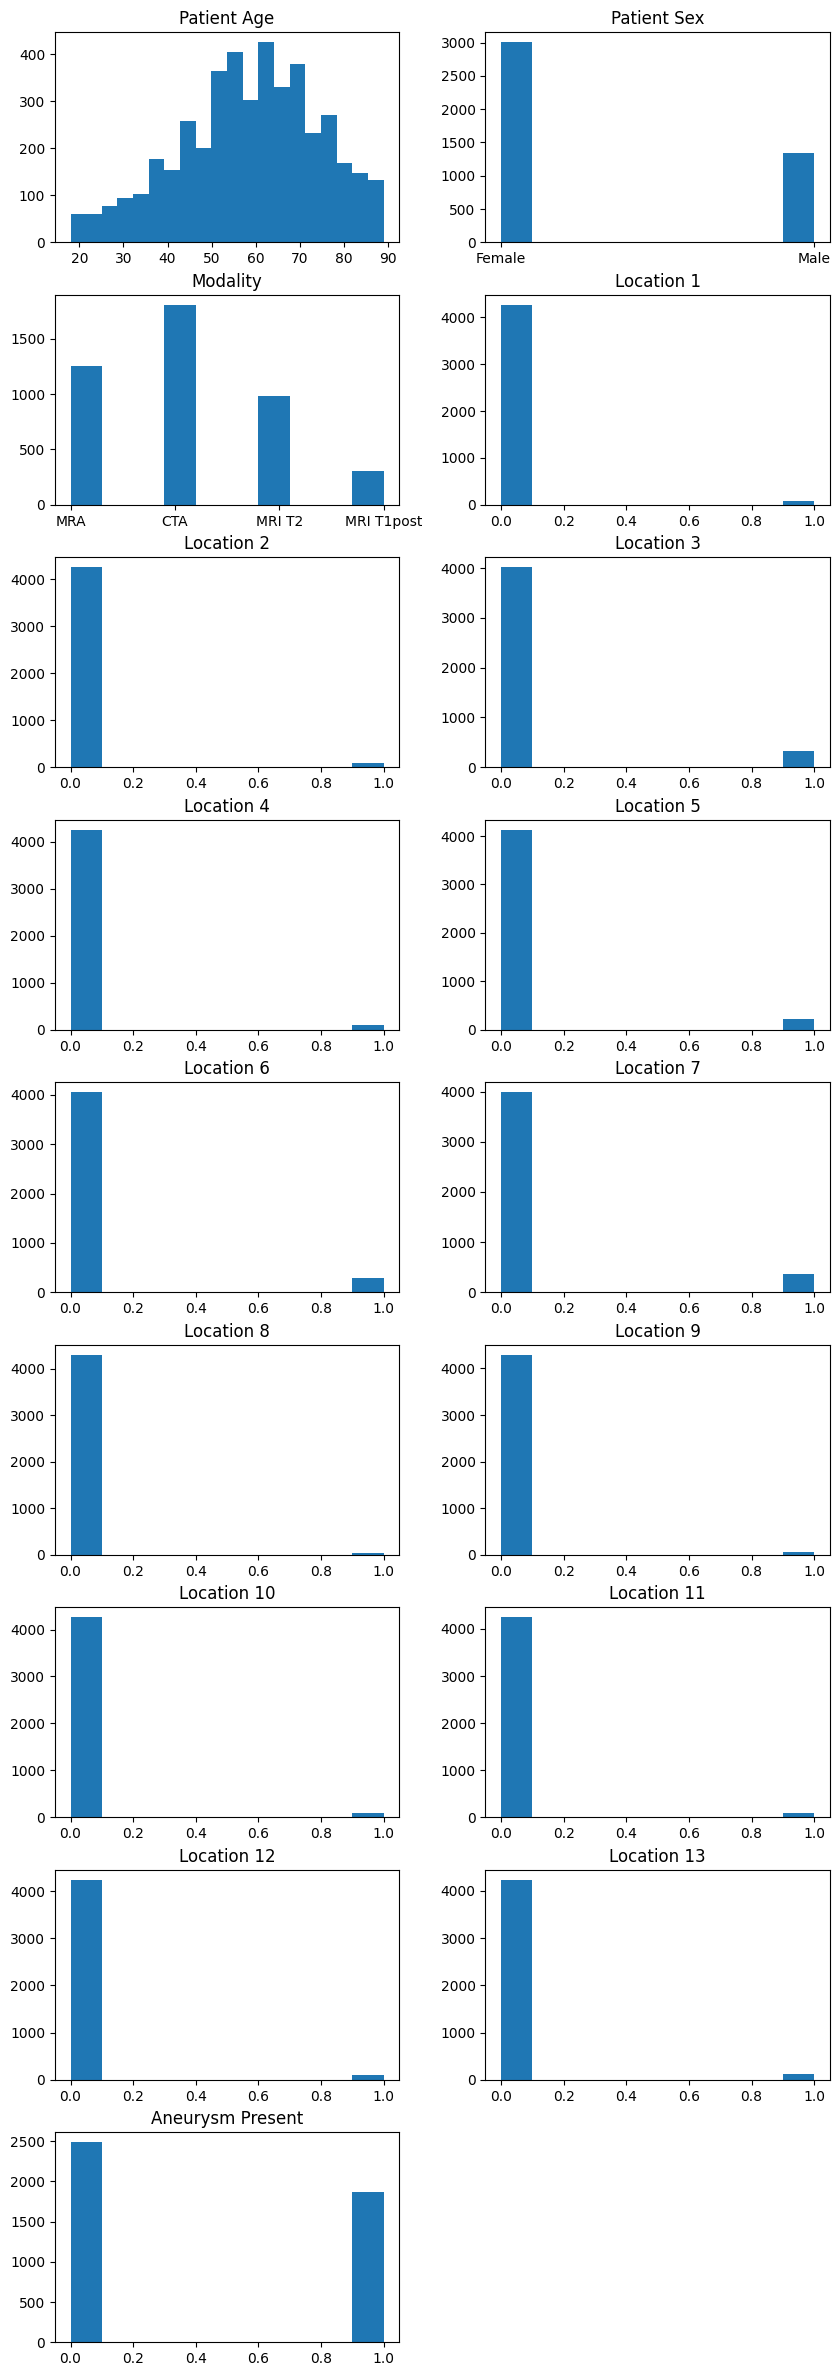

In [12]:
fig = plt.figure(figsize = (10,30))

grid = plt.GridSpec(9, 2, wspace = .25, hspace = .25)

plt.subplot(grid[0,0])
plt.hist(train['PatientAge'], bins = 20)
plt.title("Patient Age")

plt.subplot(grid[0,1])
plt.hist(train["PatientSex"])
plt.title("Patient Sex")

plt.subplot(grid[1,0])
plt.hist(train["Modality"])
plt.title("Modality")

plt.subplot(grid[1,1])
plt.hist(train['Left Infraclinoid Internal Carotid Artery'])
plt.title("Location 1")

plt.subplot(grid[2,0])
plt.hist(train['Right Infraclinoid Internal Carotid Artery'])
plt.title("Location 2")

plt.subplot(grid[2,1])
plt.hist(train['Left Supraclinoid Internal Carotid Artery'])
plt.title('Location 3')

plt.subplot(grid[3,0])
plt.hist(train['Right Infraclinoid Internal Carotid Artery'])
plt.title("Location 4")

plt.subplot(grid[3,1])
plt.hist(train['Left Middle Cerebral Artery'])
plt.title("Location 5")

plt.subplot(grid[4,0])
plt.hist(train['Right Middle Cerebral Artery'])
plt.title('Location 6')

plt.subplot(grid[4,1])
plt.hist(train['Anterior Communicating Artery'])
plt.title("Location 7")

plt.subplot(grid[5,0])
plt.hist(train['Left Anterior Cerebral Artery'])
plt.title('Location 8')

plt.subplot(grid[5,1])
plt.hist(train['Right Anterior Cerebral Artery'])
plt.title('Location 9')

plt.subplot(grid[6,0])
plt.hist(train['Left Posterior Communicating Artery'])
plt.title('Location 10')

plt.subplot(grid[6,1])
plt.hist(train['Right Posterior Communicating Artery'])
plt.title('Location 11')

plt.subplot(grid[7,0])
plt.hist(train['Basilar Tip'])
plt.title('Location 12')

plt.subplot(grid[7,1])
plt.hist(train['Other Posterior Circulation'])
plt.title('Location 13')

plt.subplot(grid[8,0])
plt.hist(train['Aneurysm Present'])
plt.title('Aneurysm Present')

plt.show()

The age of the patients go from 18 up to 89 years, with an average age around 60 years.

There are more females than males, however, at this point, we are not sure if this is a determining factor to take into acount for the model.

The modality most used for taking the images is CTA, its probably better to start focusing on these type of images.

The initial target class(Aneurysm Present) is well distributed, however, there aren't many images for each class, so it will probably be necessary to use data augmentation when trying to classify the regions of the aneurysms.

In [ ]:
len(train[train['Aneurysm Present'] == 1])

## Train localizers.csv

In [ ]:
localizers = pd.read_csv(folder_path + '/train_localizers.csv')
localizers

This csv contains 2251 observations with 4 columns corresponding to:
- SeriesInstanceUID: The unique identifier of the patient
- SOPInstanceUID: The path to the image where the aneurysm was detected
- coordinates: The coordinates of the aneurysm in the respective image
- location: The location of the aneurysm in the 13 possible regions defined in the train.csv file

In [ ]:
len(localizers['SeriesInstanceUID'].unique())

There are only 1862 patients with aneurysms detected but 2251 localizers, which implies that several patients have more than one aneurysm

In [ ]:
localizers['SeriesInstanceUID'].value_counts().value_counts()

A patient can have up to 5 aneurysms in this dataset

## Series

In [13]:
len(os.listdir(f'{folder_path}/series'))

4348

Series is a folder containing the images taken for all the patients, let's look at the images of a patient taken with each modality

In [14]:
modalities = train['Modality'].unique()
modalities

array(['MRA', 'CTA', 'MRI T2', 'MRI T1post'], dtype=object)

In [15]:
mra = train[train['Modality'] == modalities[0]].iloc[0]
cta = train[train['Modality'] == modalities[1]].iloc[0]
mri2 = train[train['Modality'] == modalities[2]].iloc[0]
mri1 = train[train['Modality'] == modalities[3]].iloc[0]

In [16]:
mra_images = os.listdir(f'{folder_path}/series/{mra["SeriesInstanceUID"]}')
len(mra_images)

188

In [17]:
cta_images = os.listdir(f'{folder_path}/series/{cta["SeriesInstanceUID"]}')
len(cta_images)

276

In [18]:
mri1_images = os.listdir(f'{folder_path}/series/{mri1["SeriesInstanceUID"]}')
len(mri1_images)

44

In [19]:
mri2_images = os.listdir(f'{folder_path}/series/{mri2["SeriesInstanceUID"]}')
len(mri2_images)

1

It stands out the radically difference in the number of files on directories for different patients, the next question that arises is, is this difference due to the method used? Or is it different from patient to patient. This is important because if we use a 3D UNet, we will need to preprocess our data to have the same input size and we will have to choose a proper value for the dimensions

First, lets check the files in each folder:

In [20]:
{mra["SeriesInstanceUID"]}

{'1.2.826.0.1.3680043.8.498.10004044428023505108375152878107656647'}

In [21]:
os.listdir(f'{folder_path}/series/{mra["SeriesInstanceUID"]}')[:10]

['1.2.826.0.1.3680043.8.498.12580127625892711720593425105721678571.dcm',
 '1.2.826.0.1.3680043.8.498.38499074916778076899905126460538333810.dcm',
 '1.2.826.0.1.3680043.8.498.10517225444888619475163956382223622124.dcm',
 '1.2.826.0.1.3680043.8.498.10676452078924881901296423855445745451.dcm',
 '1.2.826.0.1.3680043.8.498.90422058059078394032434504783504864805.dcm',
 '1.2.826.0.1.3680043.8.498.53384850834419901009268505622156934280.dcm',
 '1.2.826.0.1.3680043.8.498.70867576765634456187791966686699326964.dcm',
 '1.2.826.0.1.3680043.8.498.86979701640162311244353465328853309696.dcm',
 '1.2.826.0.1.3680043.8.498.60770159678847176449543892094785010793.dcm',
 '1.2.826.0.1.3680043.8.498.11016739249123368534712543417543889141.dcm']

In [22]:
os.listdir(f'{folder_path}/series/{cta["SeriesInstanceUID"]}')[:10]

['1.2.826.0.1.3680043.8.498.90015112421437097603956817949043937997.dcm',
 '1.2.826.0.1.3680043.8.498.84909477854024937929133442837077710954.dcm',
 '1.2.826.0.1.3680043.8.498.48561644541010937064724500444487859631.dcm',
 '1.2.826.0.1.3680043.8.498.34868031125365471279287364600084027446.dcm',
 '1.2.826.0.1.3680043.8.498.89755398485885698867867085495554443689.dcm',
 '1.2.826.0.1.3680043.8.498.66463510881494307228698981007524517157.dcm',
 '1.2.826.0.1.3680043.8.498.69584293746642416341671160166048958276.dcm',
 '1.2.826.0.1.3680043.8.498.92189053753878145349522858804758647691.dcm',
 '1.2.826.0.1.3680043.8.498.89620792439985100926153881794998788240.dcm',
 '1.2.826.0.1.3680043.8.498.85474648892364445158035353981603979861.dcm']

In [23]:
os.listdir(f'{folder_path}/series/{mri1["SeriesInstanceUID"]}')[:10]

['1.2.826.0.1.3680043.8.498.59116066411552654809274335658054839130.dcm',
 '1.2.826.0.1.3680043.8.498.47287947002764697322456880418841769615.dcm',
 '1.2.826.0.1.3680043.8.498.59784870454167061667281414298806462027.dcm',
 '1.2.826.0.1.3680043.8.498.52147035653535965281516805694660410924.dcm',
 '1.2.826.0.1.3680043.8.498.12071434844661124917129969952332751066.dcm',
 '1.2.826.0.1.3680043.8.498.20672976109534280474951270758657586484.dcm',
 '1.2.826.0.1.3680043.8.498.98947836248049315982488044715095402164.dcm',
 '1.2.826.0.1.3680043.8.498.71587504819983455216441686559923000438.dcm',
 '1.2.826.0.1.3680043.8.498.75246352407378906025883854629381096554.dcm',
 '1.2.826.0.1.3680043.8.498.10972906605322269142875414293007944369.dcm']

In [24]:
os.listdir(f'{folder_path}/series/{mri2["SeriesInstanceUID"]}')

['1.2.826.0.1.3680043.8.498.12788534311541061134282993296707574954.dcm']

All of them are .dcm files, meaning that there is just one image particullary for the MRI T2 observation taken, lets read a couple of the dcm files and see the images

### MRI 2

In [25]:
dcm_img = pydicom.dcmread(f'{folder_path}/series/{mri2["SeriesInstanceUID"]}/' + mri2_images[0], force=True)
dcm_img

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 196
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: Enhanced MR Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.8.498.69947975543301631392369571022226127126
(0002,0010) Transfer Syntax UID                 UI: RLE Lossless
(0002,0012) Implementation Class UID            UI: 1.2.804.114118.3
(0002,0013) Implementation Version Name         SH: 'RadiAnt-2025.1'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'T2', 'NONE']
(0008,0016) SOP Class UID                       UI: Enhanced MR Image Storage
(0008,0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.8.498.12788534311541061134282993296707574954
(0008,0020) Study Date          

(25, 512, 512)


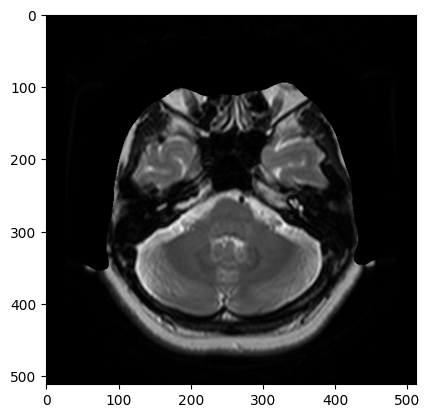

In [26]:
img_array = dcm_img.pixel_array
print(img_array.shape)

plt.imshow(img_array[3], cmap = 'gray')

In this case, even if there is only one file, this file contains 25 images of the patient, we will have to check other MRI T2 images to see if this is the general rule

### MRI 1

In [27]:
dcm_img = pydicom.dcmread(f'{folder_path}/series/{mri1["SeriesInstanceUID"]}/' + mri1_images[0], force=True)
dcm_img

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 208
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.8.498.65324968932786834855967113578788376134
(0002,0010) Transfer Syntax UID                 UI: RLE Lossless
(0002,0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.8
(0002,0013) Implementation Version Name         SH: 'OFFIS_DCMTK_368'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M', 'ND']
(0008,0016) SOP Class UID                       UI: MR Image Storage
(0008,0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.8.498.59116066411552654809274335658054839130
(0008,0020) Study Date                   

(512, 512)


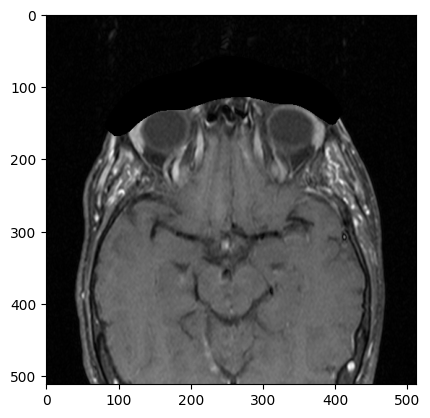

In [28]:
img_array = dcm_img.pixel_array
print(img_array.shape)

plt.imshow(img_array, cmap = 'gray')

### CTA

In [29]:
dcm_img = pydicom.dcmread(f'{folder_path}/series/{cta["SeriesInstanceUID"]}/' + cta_images[0], force=True)
dcm_img

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 218
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.8.498.50379032856875559011841864186094968623
(0002,0010) Transfer Syntax UID                 UI: RLE Lossless
(0002,0012) Implementation Class UID            UI: 1.3.6.1.4.1.30071.8
(0002,0013) Implementation Version Name         SH: 'fo-dicom 4.0.7'
(0002,0016) Source Application Entity Title     AE: 'ISP10_CMU_CT'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 166'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'SECONDARY', 'AXIAL', 'CT_SOM5 SPI']
(0008,0016) SOP Class UID                       UI: CT Image Storage
(0008,0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.8.498.9001511

(512, 512)


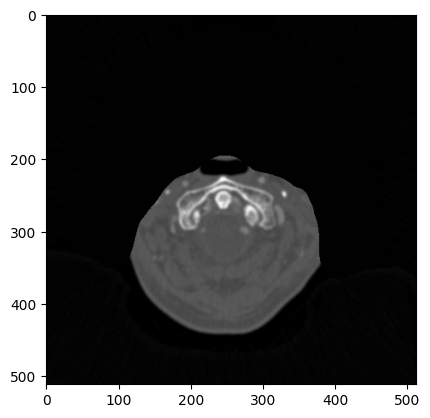

In [30]:
img_array = dcm_img.pixel_array
print(img_array.shape)

plt.imshow(img_array, cmap = 'gray')

### MRA

In [31]:
dcm_img = pydicom.dcmread(f'{folder_path}/series/{mra["SeriesInstanceUID"]}/' + mra_images[0], force=True)
dcm_img

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 208
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.8.498.56443616736081970275767338746898688161
(0002,0010) Transfer Syntax UID                 UI: RLE Lossless
(0002,0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.8
(0002,0013) Implementation Version Name         SH: 'OFFIS_DCMTK_368'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M', 'ND', 'NORM']
(0008,0016) SOP Class UID                       UI: MR Image Storage
(0008,0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.8.498.12580127625892711720593425105721678571
(0008,0020) Study Date           

(512, 512)


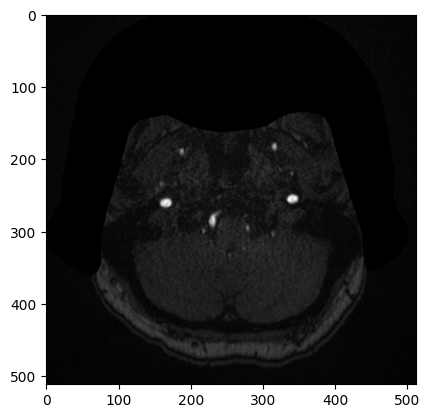

In [32]:
img_array = dcm_img.pixel_array
print(img_array.shape)

plt.imshow(img_array, cmap = 'gray')

It appears that only the MRI images come compressed into one file, so we would have to move it to multiple image files

All of the .dcm files come with many unused fields in the metadata, which can be erased during the preprocessing to reduce the size of the training files and make it portable to move to colab or other cloud servers.

Some other information as the weight of the patient may be worth storing so we could add it to the train csv if its present for all the observations, otherwise we might erase this data.

## Segmentations

In [ ]:
segmentations = os.listdir(f'{folder_path}/segmentations')
len(segmentations)

In [ ]:
segmentations = os.listdir(f'{folder_path}/segmentations')
segmentations_uid = [i[:len(segmentations[0]) - 4] for i in segmentations]

In [ ]:
len(segmentations)

In [ ]:
train[train['SeriesInstanceUID'].isin(segmentations_uid)]

In [ ]:
path = f'{folder_path}/segmentations/{segmentations[0]}'
img = nib.load(path).get_fdata()
img.shape

In [ ]:
segmentations_uid[0] in os.listdir(f'{folder_path}/series')

In [ ]:
len(os.listdir(f'{folder_path}/series/{segmentations_uid[0]}'))

The segmentations folder is a redundancy of the series folder, which stores all the images taked in a single nii file instead of multiple dcm files, so it can be deleted

## kaggle_evaluation

In [ ]:
os.listdir(f'{folder_path}/kaggle_evaluation')

In [ ]:
os.listdir(f'{folder_path}/kaggle_evaluation/series')

In [ ]:
pd.read_csv(f'{folder_path}/kaggle_evaluation/test.csv')

This is a folder meant to do the submissions of the test cases, it has only 3 cases since the rest are hidden for the contest, then, this folder wont be used

# Data preprocessing

In [5]:
import torch
from torchvision.io import read_image
from sklearn.model_selection import train_test_split

## Make an isotropic transformation for the data and convert to NIFT1 files

We want the spacing between voxels to be the same across all images, this will ease the training for the network, in some images, this will imply to add more entries, and more images, in other cases, this will imply to downsize the images.

This will be done using a linear interpolation from the itk library, which will allow us to read the images, determine the spacing between voxels and resample the image to the desired space between voxels.

After looking at the size of the images in Mb after the resampling, its best to keep the spacing between the voxels in 1mm, since reducing this space increases dramatically the size of the images, making the dataset too heavy to be workable.

When performing the resampling operation, all the slices will be joint into one simgle 3D image, which has to be stored in a different format than the multilpe dicom files in the original dataset. Thus, after performing the resampling, these will be stored in .nii files

In [3]:
!pip install itk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 MB 21.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 MB 23.7 MB/s eta 0:00:00:00:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 58.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 28.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.5/28.5 MB 57.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 73.4 MB/s eta 0:00:00:00:010:01


In [5]:
series = os.listdir(folder_path + '/series/')
len(series)

4348

In [7]:
import itk

def resample_image_and_convert_to_nii(serie, voxel_size = 1):
    # Load your 3D image (from DICOM or already built)
    image = itk.imread(folder_path+"/series/" + serie, itk.F)  # itk.imread can read a folder of DICOMs too
    
    # Original info
    original_spacing = image.GetSpacing()
    original_size = image.GetLargestPossibleRegion().GetSize()
    original_origin = image.GetOrigin()
    original_direction = image.GetDirection()
    
    # Desired new spacing
    new_spacing = [voxel_size, voxel_size, voxel_size] #Make distances to be 1mm in each dimension
    
    # Compute new size to keep the same physical extent
    new_size = [
        int(round(orig_sz * orig_spc / new_spc))
        for orig_sz, orig_spc, new_spc in zip(original_size, original_spacing, new_spacing)
    ]
    # Resampling
    resample = itk.ResampleImageFilter.New(Input=image)
    resample.SetInterpolator(itk.LinearInterpolateImageFunction.New(InputImage=image))
    resample.SetOutputSpacing(new_spacing)
    resample.SetSize(new_size)
    resample.SetOutputOrigin(original_origin)
    resample.SetOutputDirection(original_direction)
    resample.SetTransform(itk.IdentityTransform[itk.D, 3].New())
    
    resampled_image = resample.GetOutput()
    
    itk.imwrite(resampled_image, serie + "resampled_0.5mm.nii.gz")


for serie in series[:10]:
    resample_image_and_convert_to_nii(serie, voxel_size = 1)

ImageSeriesReader (0x612a5750): Non uniform sampling or missing slices detected,  maximum nonuniformity:9.242e-05



This is a parallel version to make it run faster

In [ ]:
import itk
from concurrent.futures import ProcessPoolExecutor, as_completed
import os

series = os.listdir(folder_path + "/series/")  # list of series folders

def resample_image_and_convert_to_nii(serie, voxel_size=1):
    try:
        image = itk.imread(os.path.join(folder_path, "series", serie), itk.F)
        
        # Original info
        original_spacing = image.GetSpacing()
        original_size = image.GetLargestPossibleRegion().GetSize()
        original_origin = image.GetOrigin()
        original_direction = image.GetDirection()
        
        # Desired new spacing
        new_spacing = [voxel_size] * 3
        
        # Compute new size to preserve physical extent
        new_size = [
            int(round(sz * spc / new_spc))
            for sz, spc, new_spc in zip(original_size, original_spacing, new_spacing)
        ]
        
        # Resampling
        resample = itk.ResampleImageFilter.New(Input=image)
        resample.SetInterpolator(itk.LinearInterpolateImageFunction.New(InputImage=image))
        resample.SetOutputSpacing(new_spacing)
        resample.SetSize(new_size)
        resample.SetOutputOrigin(original_origin)
        resample.SetOutputDirection(original_direction)
        resample.SetTransform(itk.IdentityTransform[itk.D, 3].New())
        
        resampled_image = resample.GetOutput()
        
        output_file = serie + f"_resampled_{voxel_size}mm.nii.gz"
        itk.imwrite(resampled_image, output_file)
        return f"Success: {serie}"
    except Exception as e:
        return f"Error processing {serie}: {e}"

# Parallel execution
max_workers = 4 
results = []

with ProcessPoolExecutor(max_workers=max_workers) as executor:
    futures = [executor.submit(resample_image_and_convert_to_nii, serie, voxel_size=1) for serie in series[:10]]
    
    for future in as_completed(futures):
        print(future.result())

Success: 1.2.826.0.1.3680043.8.498.86837346700151751310565181236786678013
Success: 1.2.826.0.1.3680043.8.498.93188368164507061784389222177130312553
Success: 1.2.826.0.1.3680043.8.498.10775557483309974755100932459198402019
Success: 1.2.826.0.1.3680043.8.498.96155132589464464482407972219172224468
Success: 1.2.826.0.1.3680043.8.498.77768594543032398307575802375574136743
Success: 1.2.826.0.1.3680043.8.498.31904828817762133812005787429884769693


ImageSeriesReader (0x612a5750): Non uniform sampling or missing slices detected,  maximum nonuniformity:9.242e-05



Success: 1.2.826.0.1.3680043.8.498.63733107218735046609724513346746625921
Success: 1.2.826.0.1.3680043.8.498.74598659816335333679754389796873480643


In [ ]:
image.shape

In [85]:
resampled_image.shape

(0, 0, 0)

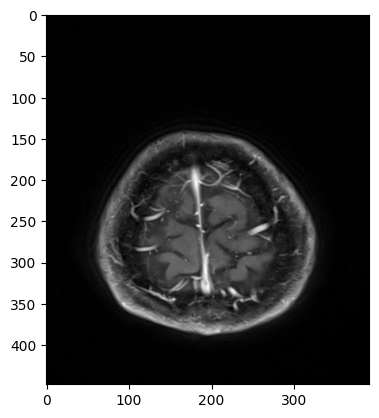

In [61]:
plt.imshow(image[101], cmap = 'gray')

In [60]:
resampled_image.shape

(180, 220, 193)

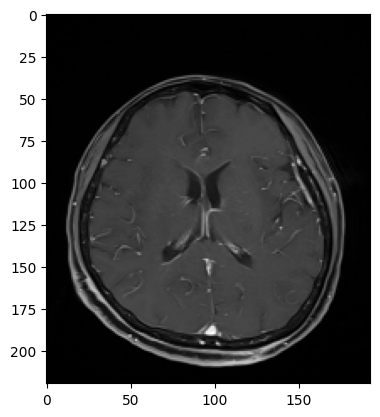

In [63]:
plt.imshow(resampled_image[101], cmap = 'gray')